# Test Notebook

This notebook is just for illustrating how all the implemented logics work and for testing their usage\
However, the complete application has been tested with the data in the json and csv files.

In [102]:
import numpy as np
import matplotlib.pyplot as plt

## Intercept Logic

In [103]:
m = 0.2875
c = 1.21

z = 10
n = 10

In [104]:
line_from_x = lambda x: m * x + c
line_from_y = lambda y: (y - c)/m 

x = np.linspace(0, z, n, endpoint=False)
k = z/n

In [105]:
X, Y = np.meshgrid(x, x)
Y_left = line_from_x(X)
Y_right = line_from_x(X+k)
X_down = line_from_y(Y)
X_up = line_from_y(Y+k)

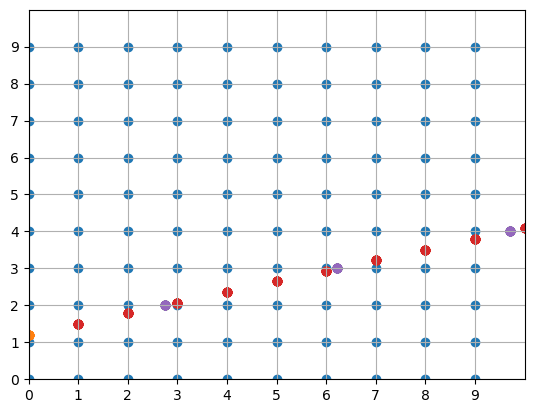

In [106]:
plt.scatter(X, Y)
plt.scatter(X, Y_left)
plt.scatter(X_down, Y)
plt.scatter(X+k, Y_right)
plt.scatter(X_up, Y+k)

plt.xlim([0, z])
plt.ylim([0, z])

plt.xticks(np.arange(0, z, k))
plt.yticks(np.arange(0, z, k))

plt.grid(visible=True);

In [107]:
Il = np.dstack([np.where(np.logical_and(Y <= Y_left, Y_left < Y+k), X, 0), 
                np.where(np.logical_and(Y <= Y_left, Y_left < Y+k), Y_left, 0)])

In [108]:
Ir = np.dstack([np.where(np.logical_and(Y <= Y_right, Y_right < Y + k), X+k, 0),
                np.where(np.logical_and(Y <= Y_right, Y_right < Y + k), Y_right, 0)])

In [109]:
Id = np.dstack([np.where(np.logical_and(X <= X_down, X_down < X + k), X_down, 0),
                np.where(np.logical_and(X <= X_down, X_down < X + k), Y, 0)])

In [110]:
Iu = np.dstack([np.where(np.logical_and(X <= X_up, X_up < X + k), X_up, 0),
                np.where(np.logical_and(X <= X_up, X_up < X + k), Y+1, 0)])

In [111]:
I = np.abs(np.abs(Il - Ir) - np.abs(Id - Iu))

In [112]:
intercept_matrix = np.apply_along_axis(lambda xy: np.sqrt(xy[0]**2 + xy[1]**2), 2, I)

In [113]:
intercept_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.04050769, 1.04050769, 0.77811879, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.2623889 , 1.04050769, 1.04050769,
        1.04050769, 0.23524522, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80526247, 1.04050769, 1.04050769, 0.73287933],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30762836],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

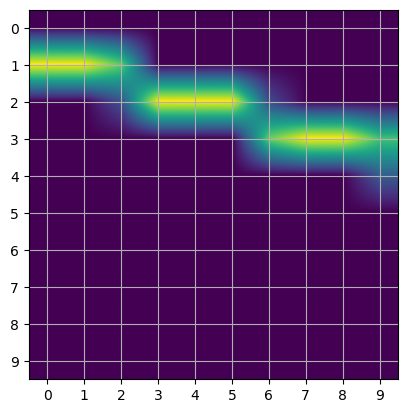

In [114]:
plt.imshow(intercept_matrix, interpolation='bilinear')

plt.xticks(np.arange(0, z, k))
plt.yticks(np.arange(0, z, k))

plt.grid(True);

In [115]:
intercept_matrix.flatten()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.04050769, 1.04050769, 0.77811879, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2623889 , 1.04050769, 1.04050769,
       1.04050769, 0.23524522, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.80526247, 1.04050769, 1.04050769, 0.73287933,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30762836,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [116]:
mat_restored = intercept_matrix.reshape(10,10)

In [117]:
mat_restored

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.04050769, 1.04050769, 0.77811879, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.2623889 , 1.04050769, 1.04050769,
        1.04050769, 0.23524522, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.80526247, 1.04050769, 1.04050769, 0.73287933],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30762836],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

## Line generating logic

In [118]:
n = 4
r = 3
phi = 2 * np.pi/ r
x = 10
theta = 0.05
z = 5

In [119]:
phis = np.array([i * phi for i in range(r)], ndmin=2)
thetas = np.array(
    [i / 2 * theta for i in range(-n + 1, n, 2)]
    if n % 2 == 0 else
    [i * theta for i in range(-(n // 2), n // 2 + 1)],
    ndmin=2)

In [120]:
thetas

array([[-0.075, -0.025,  0.025,  0.075]])

In [121]:

# distances from the centre of the object
distances_from_center = x * np.sin(thetas)

# beta is slope of line (angle from +ve x-axis)
# generate all possible values of beta for different combinations of theta and phi
betas = (np.pi / 2 - thetas) + phis.T

In [122]:
distances_from_center

array([[-0.74929707, -0.24997396,  0.24997396,  0.74929707]])

In [123]:
betas

array([[1.64579633, 1.59579633, 1.54579633, 1.49579633],
       [3.74019143, 3.69019143, 3.64019143, 3.59019143],
       [5.83458653, 5.78458653, 5.73458653, 5.68458653]])

In [124]:
# changing origin
distances_from_bottom_left = (1 - 1 / np.tan(betas)) * (z / 2) + distances_from_center/np.sin(betas)

In [125]:
distances_from_bottom_left

array([[ 1.93644293,  2.31246093,  2.68753907,  3.06355707],
       [ 0.16450413, -1.1111115 , -2.61424363, -4.42163463],
       [ 9.42163463,  7.61424363,  6.1111115 ,  4.83549587]])

In [126]:
# merge distance and angle into a couple of parameters
line_params_array = np.dstack([distances_from_bottom_left, betas]).reshape(-1, 2)
line_params_array

array([[ 1.93644293,  1.64579633],
       [ 2.31246093,  1.59579633],
       [ 2.68753907,  1.54579633],
       [ 3.06355707,  1.49579633],
       [ 0.16450413,  3.74019143],
       [-1.1111115 ,  3.69019143],
       [-2.61424363,  3.64019143],
       [-4.42163463,  3.59019143],
       [ 9.42163463,  5.83458653],
       [ 7.61424363,  5.78458653],
       [ 6.1111115 ,  5.73458653],
       [ 4.83549587,  5.68458653]])

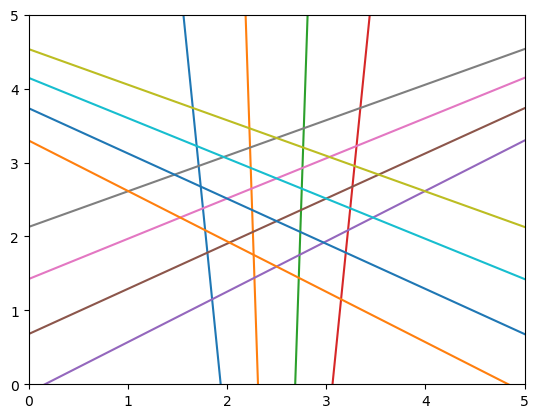

In [127]:
xp = np.linspace(0, z)
for i, line in enumerate(line_params_array):
    yp = np.tan(line[1]) * (xp - line[0])
    plt.plot(xp, yp, label=i)
    
plt.xlim([0, z])
plt.ylim([0, z]);
# plt.legend()

## Gauss Elimination

In [128]:
def gauss_elimination(A, b):
    n = len(b)
    
    # augmenting A matrix with b
    aug_matrix = np.hstack((A, b.reshape(-1, 1)))
    
    # Forward elimination
    for i in range(n):
        # partial pivoting
        max_row = i + np.argmax(np.abs(aug_matrix[i:, i]))
        aug_matrix[[i, max_row]] = aug_matrix[[max_row, i]]
        
        pivot = aug_matrix[i, i]
        assert pivot != 0, 'singular / near-singular matrix'
        
        aug_matrix[i, :] /= pivot
        
        for j in range(i + 1, n):
            factor = aug_matrix[j, i]
            aug_matrix[j, :] -= factor * aug_matrix[i, :]
    
    # Backward substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = aug_matrix[i, -1] - np.dot(aug_matrix[i, i+1:n], x[i+1:n])
    
    return x